# SD212: Graph mining
## Lab 7: Soft Clustering

You will learn how to apply soft clustering methods to graphs and to compare them to classic clustering methods.

You **must** be connected to Telecom ParisTech network!

## Getting started

In [131]:
from connector import Connector

In [132]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
base_url = 'http://137.194.192.13:8234'
lab_id = 'lab7'

## To do

* Enter your login and test it using question #0

In [134]:
# Enter your login (last name followed by first letter of first name)
login = 'zhuf'

In [135]:
connector = Connector(base_url, lab_id, login)
get_question = connector.get_question
post_answer = connector.post_answer
post_text = connector.post_text

In [136]:
get_question(0)

Welcome!


## Import

In [137]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [138]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [139]:
import numpy as np

In [140]:
colors = ['b','g','r','c','m','gold','orange','gray','k','w']

## 1. Soft modularity

Consider an undirected, weighted graph of $n$ nodes and $m$ edges with adjacency matrix $A$.

We use $w_i$ to denote the weighted degree of node $i$,
$w_i=\sum_{j\in V} A_{ij}$,
and $w$ the total weight of the graph $w = \sum_{i\in V} w_i$.

Given a clustering $C$, the classic modularity is defined as:
$$Q(C) = \frac{1}{w} \sum_{i,j\in V} \left( A_{ij} - \frac{w_i w_j}{w} \right) \delta_{C(i),C(j)}.$$

Given a membership matrix $\mathbf{p}\in [0,1]^{n\times K}$, the soft modularity is defined as:
$$Q(\mathbf{p}) = \frac{1}{w} \sum_{i,j\in V} \left(A_{ij} - \frac{w_i w_j}{w}\right)
{\mathbf{p}_{i\cdot}}^T \mathbf{p}_{j\cdot}.$$

## Toy graph

Consider the following graph:

In [141]:
edgelist = [(0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6)]
G = nx.Graph()
G.add_edges_from(edgelist)
pos = nx.spring_layout(G, center=(.5, .5), scale=.5)

We compute the adjacency matrix of the graph

In [142]:
nodes = list(G.nodes())
A = nx.adj_matrix(G, nodes)

In [143]:
A.toarray()

array([[0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 1, 1, 0]], dtype=int32)

Consider the following clustering:

In [144]:
C = {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1}

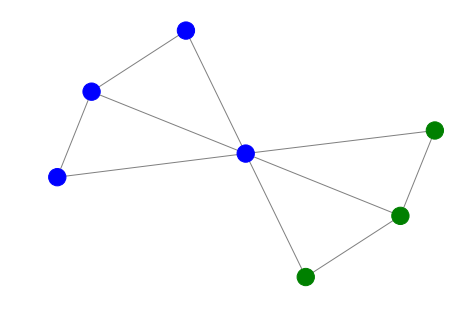

In [145]:
figure()
node_color = [colors[C[u] % len(colors)] for u in G.nodes()]
nx.draw(G, pos, node_color=node_color, edge_color='gray')

## To do

* Complete the function `modularity` below and apply it to the clustering defined above
* Answer question #1 **(0.5 point)**

In [160]:
print(A[0,1])

1


In [173]:
def modularity(A, C, gamma):
    # A: adjacency matrix of a weighted graph
    # C: clustering (dictionary)
    # gamma: resolution parameter
    # Returns: Q, modularity (at resolution gamma)
    Q = 0
    w = np.sum(A)
    _sum = 0.0
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if( C[i] == C[j]):
                _sum = _sum + (A[i,j] - np.sum(A[i]) * np.sum(A[j]) /w)*gamma
    Q = _sum/w
    return Q

In [174]:
print(modularity(A, C, 1.))

0.15499999999999997


In [175]:
get_question(1)

What is the modularity of the clustering C at resolution 1?
(Enter a float)


In [176]:
answer = 0.154999999

In [177]:
post_answer(1, answer)

This is correct!


Consider the following membership matrix:

In [206]:
p = np.zeros((7, 2))
p[(0, 0)] = 1.
p[(1, 0)] = 1.
p[(2, 0)] = 1
p[(3, 0)] = .5
p[(3, 1)] = .5
p[(4, 1)] = 1.
p[(5, 1)] = 1.
p[(6, 1)] = 1.
print(p)

[[1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.5 0.5]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]]


In [207]:
def plot_communities(graph, pos, membership, figsize=(4, 4)):
    fig = plt.figure(figsize=figsize)
    ax = plt.axes([0, 0, 1, 1])
    ax.set_aspect('equal')
    nx.draw_networkx_edges(graph, pos, ax=ax)

    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)

    plt.axis('off')
    trans = ax.transData.transform
    trans2 = fig.transFigure.inverted().transform

    pie_size = 0.05
    p2 = pie_size / 2.0
    for node in graph:
        xx, yy = trans(pos[node])   # figure coordinates
        xa, ya = trans2((xx, yy))   # axes coordinates
        a = plt.axes([xa - p2, ya - p2, pie_size, pie_size])
        a.set_aspect('equal')
        fractions = membership[node]
        a.pie(fractions)
    plt.show()

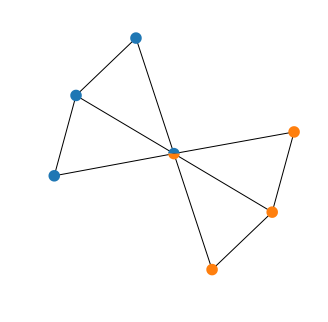

In [208]:
plot_communities(G, pos, p)

## To do

* Complete the function `soft_modularity` below and apply it to the membership matrix defined above
* Answer question #2 (**0.5 point**)
* Answer question #3 (**open answer**)

In [230]:
def soft_modularity(A, p, gamma):
    # A: adjacency matrix of a weighted graph
    # p: membership matrix
    # gamma: resolution parameter
    # Returns: Q, modularity (at resolution gamma)
    Q = 0
    # to be completed
    
        # A: adjacency matrix of a weighted graph
    # C: clustering (dictionary)
    # gamma: resolution parameter
    # Returns: Q, modularity (at resolution gamma)
    Q = 0
    w = np.sum(A)
    _sum = 0.0
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            p_v = p[i].T.dot(p[j])
            _sum = _sum + (A[i,j] - np.sum(A[i]) * np.sum(A[j]) /w) * p_v
    Q = _sum/w
    
    return Q

In [210]:
p

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ]])

In [204]:
p[0].T.dot(p[0])
b

NameError: name 'b' is not defined

In [211]:
print(soft_modularity(A, p, 1.))

1.0
1.0
1.0
0.5
0.0
0.0
0.0
1.0
1.0
1.0
0.5
0.0
0.0
0.0
1.0
1.0
1.0
0.5
0.0
0.0
0.0
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.0
0.0
0.0
0.5
1.0
1.0
1.0
0.0
0.0
0.0
0.5
1.0
1.0
1.0
0.0
0.0
0.0
0.5
1.0
1.0
1.0
0.2


In [212]:
get_question(2)

What is the soft modularity of the membership matrix p at resolution 1?
(Enter a float)


In [213]:
answer = 0.2

In [214]:
post_answer(2, answer)

This is correct!


In [216]:
get_question(3)

Comment the results.


In [217]:
post_text(3)

Textarea(value='...')

Button(description='Send', style=ButtonStyle())

# 2. Multiple runs of Louvain

We define the Louvain algorithm that optimizes the classic modularity function.

In [218]:
def maximize(G, gamma, random_seed):
    # G: networkx graph (undirected, weighted)
    # gamma: float (resolution)
    # Returns: dictionary (cluster of each node)
    
    # node weights
    node_weight = {u: 0 for u in G.nodes()}
    # sum of edge weights
    w = 0
    for (u,v) in G.edges():
        # self-loops are counted twice
        node_weight[u] += G[u][v]['weight']
        node_weight[v] += G[u][v]['weight']
        w += G[u][v]['weight']
    # init the clustering
    C = {u:u for u in G.nodes()}
    # cluster weights
    cluster_weight = {u:node_weight[u] for u in G.nodes()}
    # node-cluster weights 
    node_cluster_weight = {u:{v:G[u][v]['weight'] for v in G.neighbors(u) if v != u} for u in G.nodes()}
    increase = True
    while increase:
        increase = False
        nodes = list(G.nodes())
        random.seed(random_seed)
        random.shuffle(nodes)
        for u in nodes:
            k = C[u]
            # target cluster, to be modified
            l_max = k
            Delta_Q_max = 0
            for l in node_cluster_weight[u]:
                Delta_Q = node_cluster_weight[u][l]
                if k in node_cluster_weight[u]:
                    Delta_Q -= node_cluster_weight[u][k]
                Delta_Q -= gamma * node_weight[u] / (2 * w) * \
                    (cluster_weight[l] - cluster_weight[k] + node_weight[u])
                if Delta_Q > Delta_Q_max:
                    Delta_Q_max = Delta_Q
                    l_max = l
            l = l_max
            if l != k:
                increase = True
                # move u from cluster k to cluster l
                C[u] = l
                cluster_weight[k] -= node_weight[u]
                cluster_weight[l] += node_weight[u]
                for v in G.neighbors(u):
                    if v != u:
                        node_cluster_weight[v][k] -= G[u][v]['weight']
                        if node_cluster_weight[v][k] <= 0:
                            node_cluster_weight[v].pop(k)
                        if l not in node_cluster_weight[v]:
                            node_cluster_weight[v][l] = 0
                        node_cluster_weight[v][l] += G[u][v]['weight']
    return C

In [219]:
def aggregate(G,C):
    # G: networkx graph
    # C: dictionary (clustering)
    # Returns: networkx graph (aggregate graph)
    H = nx.Graph()
    for u in G.nodes():
        H.add_node(C[u])
    for (u,v) in G.edges():
        if H.has_edge(C[u],C[v]):
            H[C[u]][C[v]]['weight'] += G[u][v]['weight']
        else:
            H.add_edge(C[u],C[v])
            H[C[u]][C[v]]['weight'] = G[u][v]['weight']
    return H

In [220]:
def louvain(G, gamma=1, random_seed=0):
    # G: networkx graph (undirected, weighted)
    # gamma: float (resolution)
    # Returns a dictionary (cluster of each node)
    if nx.get_edge_attributes(G,'weight') == {}:
        for (u,v) in G.edges():
            G[u][v]['weight'] = 1
    C = maximize(G, gamma, random_seed)
    n = len(C)
    k = len(set(C.values()))
    while k < n:
        H = aggregate(G,C) 
        C_new = maximize(H, gamma, random_seed)
        C = {u: C_new[C[u]] for u in G.nodes()}
        n = k
        k = len(set(C.values()))
    # reindex cluster values
    cluster_values = list(set(C.values()))
    reindex = {c:i for i,c in enumerate(cluster_values)}
    C = {u:reindex[C[u]] for u in C}
    return C

This implementation of `louvain` takes a parameter called `random_seed` that controls the order in which the nodes are considered in the `maximize` sub-routine.

Different values of `random_seed` might produce different results.

In [221]:
C = louvain(G, random_seed=0)

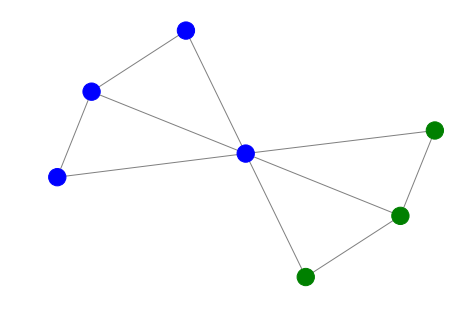

In [222]:
figure()
node_color = [colors[C[u] % len(colors)] for u in G.nodes()]
nx.draw(G, pos, node_color=node_color, edge_color='gray')

In [223]:
C = louvain(G, random_seed=3)

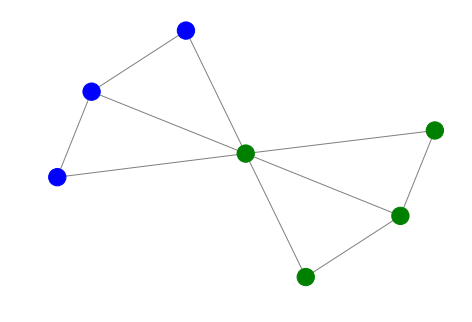

In [224]:
figure()
node_color = [colors[C[u] % len(colors)] for u in G.nodes()]
nx.draw(G, pos, node_color=node_color, edge_color='gray')

We now consider the graph of [Les Misérables](https://fr.wikipedia.org/wiki/Les_Misérables) (co-occurence of characters in chapters of the novel of Victor Hugo), than can be downloaded [here](http://perso.telecom-paristech.fr/~bonald/graphs/lab6.zip).

## To do

* Apply the Louvain algorithm to the Misérables graph for values of the `random_seed` parameter ranging from 0 to 99 (included)
* Answer question #4 (**1 point**)
* Answer question #5 (**open answer**)

In [225]:
G = nx.read_graphml("miserables.graphml", node_type = int)
names = nx.get_node_attributes(G, 'name')
pos = nx.spring_layout(G)

In [229]:
C = louvain(G, gamma=1, random_seed=0)


{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 3, 11: 3, 12: 4, 13: 3, 14: 3, 15: 3, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4, 21: 4, 22: 4, 23: 4, 24: 2, 25: 2, 26: 3, 27: 3, 28: 3, 29: 1, 30: 3, 31: 3, 32: 3, 33: 3, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 3, 40: 2, 41: 2, 42: 2, 43: 3, 44: 3, 45: 3, 46: 5, 47: 5, 48: 5, 49: 3, 50: 3, 51: 3, 52: 3, 53: 3, 54: 3, 55: 3, 56: 3, 57: 5, 58: 5, 59: 5, 60: 5, 61: 5, 62: 5, 63: 5, 64: 5, 65: 5, 66: 5, 67: 5, 68: 2, 69: 2, 70: 2, 71: 2, 72: 3, 73: 5, 74: 5, 75: 2, 76: 5}


In [233]:
for x in G.nodes(True):
    print(x)

(0, {'name': 'Myriel'})
(1, {'name': 'Napoleon'})
(2, {'name': 'Mlle Baptistine'})
(3, {'name': 'Mme Magloire'})
(4, {'name': 'Countess de Lo'})
(5, {'name': 'Geborand'})
(6, {'name': 'Champtercier'})
(7, {'name': 'Cravatte'})
(8, {'name': 'Count'})
(9, {'name': 'Old man'})
(10, {'name': 'Labarre'})
(11, {'name': 'Valjean'})
(12, {'name': 'Marguerite'})
(13, {'name': 'Mme Der'})
(14, {'name': 'Isabeau'})
(15, {'name': 'Gervais'})
(16, {'name': 'Tholomyes'})
(17, {'name': 'Listolier'})
(18, {'name': 'Fameuil'})
(19, {'name': 'Blacheville'})
(20, {'name': 'Favourite'})
(21, {'name': 'Dahlia'})
(22, {'name': 'Zephine'})
(23, {'name': 'Fantine'})
(24, {'name': 'Mme Thenardier'})
(25, {'name': 'Thenardier'})
(26, {'name': 'Cosette'})
(27, {'name': 'Javert'})
(28, {'name': 'Fauchelevent'})
(29, {'name': 'Bamatabois'})
(30, {'name': 'Perpetue'})
(31, {'name': 'Simplice'})
(32, {'name': 'Scaufflaire'})
(33, {'name': 'Woman1'})
(34, {'name': 'Judge'})
(35, {'name': 'Champmathieu'})
(36, {'name'

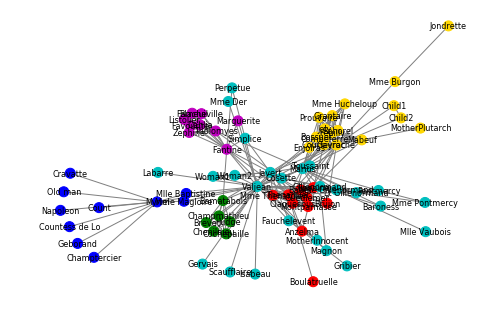

In [227]:
figure()
node_color = [colors[C[u] % len(colors)] for u in G.nodes()]
nx.draw(G, pos, labels = names, font_size = 8, node_size = 100, edge_color = 'gray',node_color = node_color)

In [238]:
get_question(4)

When Louvain is executed with values of the random_seed parameter ranging from 0 to 99 (included), in which proportion of the cases Magnon is in the same community as Valjean?
(Enter a float)


In [239]:
answer = 1

In [243]:
v_sum = 0
for n in range(100):
    C = louvain(G, gamma=1, random_seed=n)
    if(C[50] == C[11]):
        v_sum = v_sum + 1
print(v_sum)

70


In [244]:
post_answer(4, 0.7)

This is correct!


In [245]:
get_question(5)

Comment the results.


In [55]:
post_text(5)

Textarea(value='...')

Button(description='Send', style=ButtonStyle())

Answer posted


# 3. Projection onto the probability simplex

The algorithm to optimize the soft modularity repeats for different values of $i$ the following steps:

- $\hat{\mathbf{p}}_{i\cdot} \leftarrow \alpha \mathbf{p}_{i\cdot}
+ t \sum_{j\in V}\left(A_{ij} - \gamma \frac{w_i w_j}{w} \right) \mathbf{p}_{j\cdot}$
- $\mathbf{p}_{i\cdot} \leftarrow \pi_{\mathcal{Y}}(\hat{\mathbf{p}}_{i\cdot})$.

where $\pi_{\mathcal{Y}}$ is the projection onto the probability simplex $\mathcal{Y} = \{ \mathbf{q}\in\mathbb{R}^n : \mathbf{q} \geq 0, \mathbf{1}^T \mathbf{q} = 1 \}$.


The algorithm to perform the projection is the following:

- Sort the vector $\mathbf{v}$ into $\mathbf{\mu}$:
$\mu_1\geq \mu_2\geq \dots \geq \mu_n$.
- Find $\rho =\max\left\{ j=1,\ldots,n,\:\mu_j-\frac{1}{j}\left( \sum_{r=1}^j \mu_r -1\right)>0\right\}$.
- Define $\theta = \frac{1}{\rho}\left(\sum_{i=1}^\rho \mu_i-1 \right)$.
- Finally return $\pi_{\mathcal{Y}} \left(\mathbf{v}\right) = (\mathbf{v} - \theta\mathbf{1})_+$, where $(\mathbf{x})_+$ denotes the soft-thresholding operation $[(\mathbf{x})_+]_k = \max(x_k, 0)$.


## To do

* Complete the function `project` below to perform the projection onto $\mathcal{Y}$
* Answer question #6 (**1 point**)

In [326]:
v = [.5, .4, .3, .4, .3, .1]
u = sorted(v, reverse=True)
rho = [u[i] - 1/(i+1)*(np.sum(u[:i+1]) - 1) for i in range(len(v))]
print('rho', rho)
rho = np.argmax(rho) + 1
print(rho)
theta = 1/5 * (np.sum(u[:5]) - 1)
print(theta)
print(v - theta * np.ones(len(v)))

rho [1.0, 0.45, 0.30000000000000004, 0.14999999999999997, 0.11999999999999994, -0.06666666666666665]
1
0.18000000000000005
[ 0.32  0.22  0.12  0.22  0.12 -0.08]


In [330]:
def project(v):
    # v: vector
    # Returns: w, projection onto the probability simplex
    u = sorted(v, reverse=True)
    rho = [u[i] - 1/(i+1)*(np.sum(u[:i+1]) - 1) for i in range(len(v))]
    print("rho", rho)
    index = 0
    for i in range(len(rho)):
        if rho[i]>0:
            index = i+1
    rho = index
    theta = 1/rho * (np.sum(u[:rho]) - 1)
    pro = v - theta * np.ones(len(v))
    
    return [ max(x,0) for x in pro] 

We consider the vector $v$ defined as

In [331]:
v = [.5, .4, .3, .4, .3, .1]

In [332]:
pro = project(v)
print(pro)

rho [1.0, 0.45, 0.30000000000000004, 0.14999999999999997, 0.11999999999999994, -0.06666666666666665]
[0.31999999999999995, 0.21999999999999997, 0.11999999999999994, 0.21999999999999997, 0.11999999999999994, 0]


In [280]:
get_question(6)

What is the value of the third component of the projection of the vector v into the probability simplex?
(Enter a float)


In [302]:
answer = 0.12

In [303]:
post_answer(6, answer)

This is correct!


# 4. Soft clustering algorithm

We use the following algorithm to optimize the soft modularity.
- **Initialization:**
    * $C\leftarrow$ result of Louvain
    * $\forall i,k$, $p_{ik} \leftarrow \begin{cases} 1 & C(i)=k\\ 0 & \text{otherwise}\end{cases}$
    * $\forall k$, $\bar{\mathbf{p}}_k \leftarrow \sum_{i} \frac{w_i}{w} p_{ik}$.
- **One epoch:** For each node $i\in V$,
    * $\forall k$,
    $\hat{p}_{ik}\leftarrow \alpha p_{ik} + t\sum_{j\sim i}A_{ij}(p_{jk} - \gamma \bar{p}_k)$
    * $\mathbf{p}_{i\cdot}^+ \leftarrow \mathrm{project}(\hat{\mathbf{p}}_{i\cdot})$
    * $\bar{\mathbf{p}} \leftarrow \bar{\mathbf{p}} + (w_i/w) (\mathbf{p}_{i\cdot}^+ - \mathbf{p}_{i\cdot})$
    and $\mathbf{p}_{i\cdot}\leftarrow \mathbf{p}_{i\cdot}^+$.


## Toy graph

In [323]:
edgelist = [(0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6)]
G = nx.Graph()
G.add_edges_from(edgelist)
pos = nx.spring_layout(G, center=(.5, .5), scale=.5)

In [324]:
nodes = list(G.nodes())
A = nx.adj_matrix(G, nodes)

## To do

* Complete the function `soft_maximize` below to implement the soft modularity optimization algorithm
* Answer question #7 (**1 point**)

In [364]:
def soft_maximize(A, gamma=1., alpha=1., t=1., n_epochs=1):
    # G: networkx graph
    # gamma: resolution parameter
    # alpha: bias parameter
    # t: learning rate
    # n_epochs: number of epochs
    # Returns: membership matrix
    n = A.shape[0]
    w_vec = np.array([np.sum(A[i]) for i in range(n)])
    w = np.sum(w_vec)
    # Initialization
    G= nx.from_scipy_sparse_matrix(A)
    C = louvain(G, gamma)
    K = max(C.values()) + 1
    p = np.zeros((n, K))
    p_bar = np.zeros((K))
    t_pri = 2*t / w
    # TO COMPLETE: initialization of p and p_bar
    
    # Optimization
    print(soft_modularity(A, p, gamma))
    for epoch in range(n_epochs):
        print("Epoch {}".format(epoch))
        for i in range(n):
            p_i_hat = np.zeros_like(p_bar)
            print(p_bar.shape)
            # TO COMPLETE: calculation of p_i_hat
            for k in range(K):
                item = 0
                for j in G.neighbors(i):
                    item = item + A[i,j]*(p[j,k] - p_bar[k])
                p_i_hat[k] = p[i,k] + t_prim * item
                
            p_i_plus = project(p_i_hat)
            p_bar = p_bar + (w_vec[i] / w) * (p_i_plus - p[i, :])
            p[i, :] = p_i_plus
        print(soft_modularity(A, p, gamma))
    return p

In [365]:
p = soft_maximize(A, gamma=1., alpha=1., t=1., n_epochs=10)

[2, 66, 344, 388]
0.0
Epoch 0
(4,)


NameError: name 't_prim' is not defined

In [ ]:
plot_communities(G, pos, p)

In [333]:
get_question(7)

What is the soft modularity obtained after 10 epochs with parameters gamma=1., alpha=1. and t=1.?
(Enter a float)


In [334]:
answer = 0.19948

In [335]:
post_answer(7, answer)

This is correct!


## Openflights

We now consider the graph of [OpenFlights](https://openflights.org) (number of daily flights between airports), than can be downloaded [here](http://perso.telecom-paristech.fr/~bonald/graphs/lab6.zip).

In [339]:
G = nx.read_graphml("openflights.graphml", node_type = int)
G.remove_edges_from(nx.selfloop_edges(G))
G = G.subgraph([node for node in G if G.degree(node) > 20])
giant_component = list(nx.connected_components(G))[0]
G = G.subgraph(giant_component)
# Get names
names = nx.get_node_attributes(G, 'name')

We define the adjacency matrix of the graph.

**Warning:** the $i^{th}$ row of $A$ corresponds to the $i^{th}$ element of the list `nodes` and not to the node with index $i$ in the object `G`. The same remark applies to columns of $A$.

In [340]:
nodes = list(G.nodes())
A = nx.adj_matrix(G, nodes)

We define the size of a *soft* cluster $k$ as follows
$$S_k = \sum_{i} p_{ik}$$
and we define its weight as
$$W_k = \sum_{i} w_{ik} p_{ik} = \bar{p}_k w.$$

## To do

* Apply the soft modularity optimization algorithm to the OpenFlights graph with parameters `gamma=1.5`, `alpha=0.`, `t=.5` and `n_epochs=3`
* Print the size and the weight of each cluster.
* Print the Top 10 nodes in terms of degree $w_i$ in each clustes.
* List all the nodes that have a positive probability to belong to more than one cluster
* Find all the clusters to which 'Lisbon Portela Airport' has a probability to belong. Print the Top 10 nodes in terms of degree $w_i$ in these clusters.
* Answer question #8 and #9 (**0.5 point**)
* Answer question #10 (**open answer**)

In [341]:
get_question(8)

What is the proportion of nodes with 'mixed membership', i.e. the proportion of nodes that have a positive probability to belong to more than one cluster?
(Enter a float)
We assume that the soft clustering algorithm has been executed with parameters gamma=1.5, alpha=0., t=.5 and n_epochs=3.


In [355]:
answer = 0.023809523809523808

In [356]:
post_answer(8, answer)

This is correct!


In [357]:
get_question(9)

What is the name of the airport that belongs at the same time to the smallest cluster in terms of weight and the second smallest cluster in terms of size?
(Enter a string. The answer must correspond to the content of the 'names' list.)


In [366]:
post_answer(9, 'Berlin-Schönefeld International Airport')

This is correct!


In [367]:
get_question(10)

Comment the results.


In [368]:
post_text(10)

Textarea(value='...')

Button(description='Send', style=ButtonStyle())